In [1]:
import gudhi as gd
import json
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import utils
from random import choice, sample
from rdkit import Chem

with open("data/Drugbank2019_MS_CFMID4.0.json", mode = "r") as drugbank:
    db = json.load(drugbank)

In [2]:
mixtures = list()
for m in tqdm(list(db.keys())):
    mixtures.append(utils.create_gaussian_mixtures(
        (db[m]["energy0"], db[m]["energy1"], db[m]["energy2"]),
        sigma = 2
    ))

  0%|          | 0/9701 [00:00<?, ?it/s]

## Plotting kernel functions of spectra
Since the ms are now continuous functions the topological features depend on the domain where the function is evaluated.

<IPython.core.display.Javascript object>


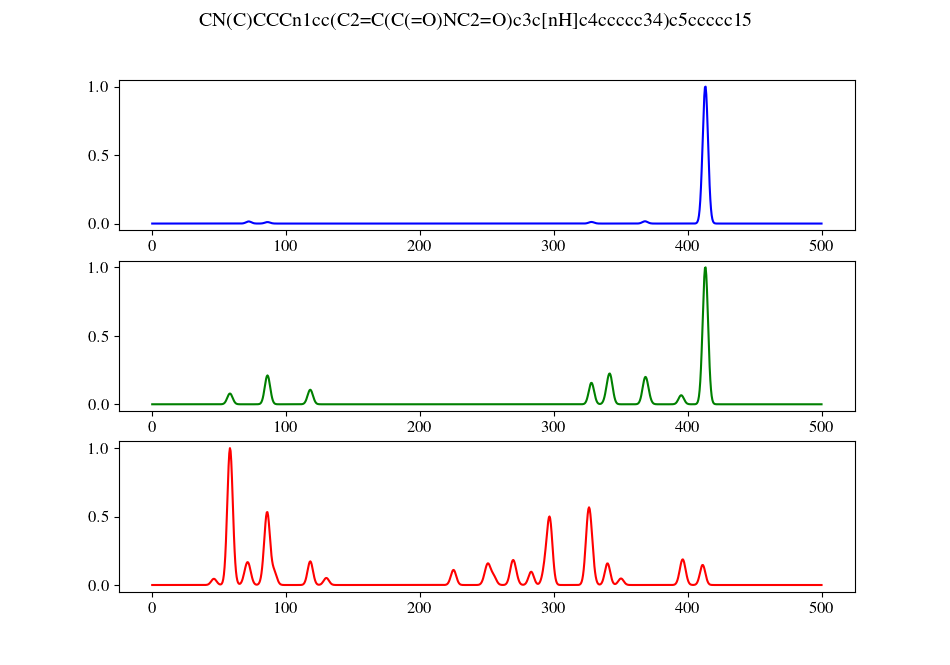

In [5]:
%matplotlib notebook

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times",
    "font.size": 12,
})

idx = choice(list(range(len(mixtures))))
mol_str = list(db.keys())[idx]
ms = mixtures[idx]
x_def = np.linspace(0, 500, 1000)

fig = plt.figure()
fig.suptitle(mol_str)
ax = fig.add_subplot(311)
ax.plot(x_def, ms[0](x_def), color = "blue")

ax = fig.add_subplot(312)
ax.plot(x_def, ms[1](x_def), color = "green")

ax = fig.add_subplot(313)
ax.plot(x_def, ms[2](x_def), color = "red")

CN(C)CCCn1cc(C2=C(C(=O)NC2=O)c3c[nH]c4ccccc34)c5ccccc15


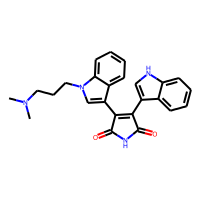

In [7]:
mol = Chem.MolFromSmiles(mol_str)
print(mol_str)
Chem.Draw.MolsToImage([mol], useSVG = True, SubImgSize = (400,400))

## Plotting 3-D spectral strings as point clouds

<IPython.core.display.Javascript object>


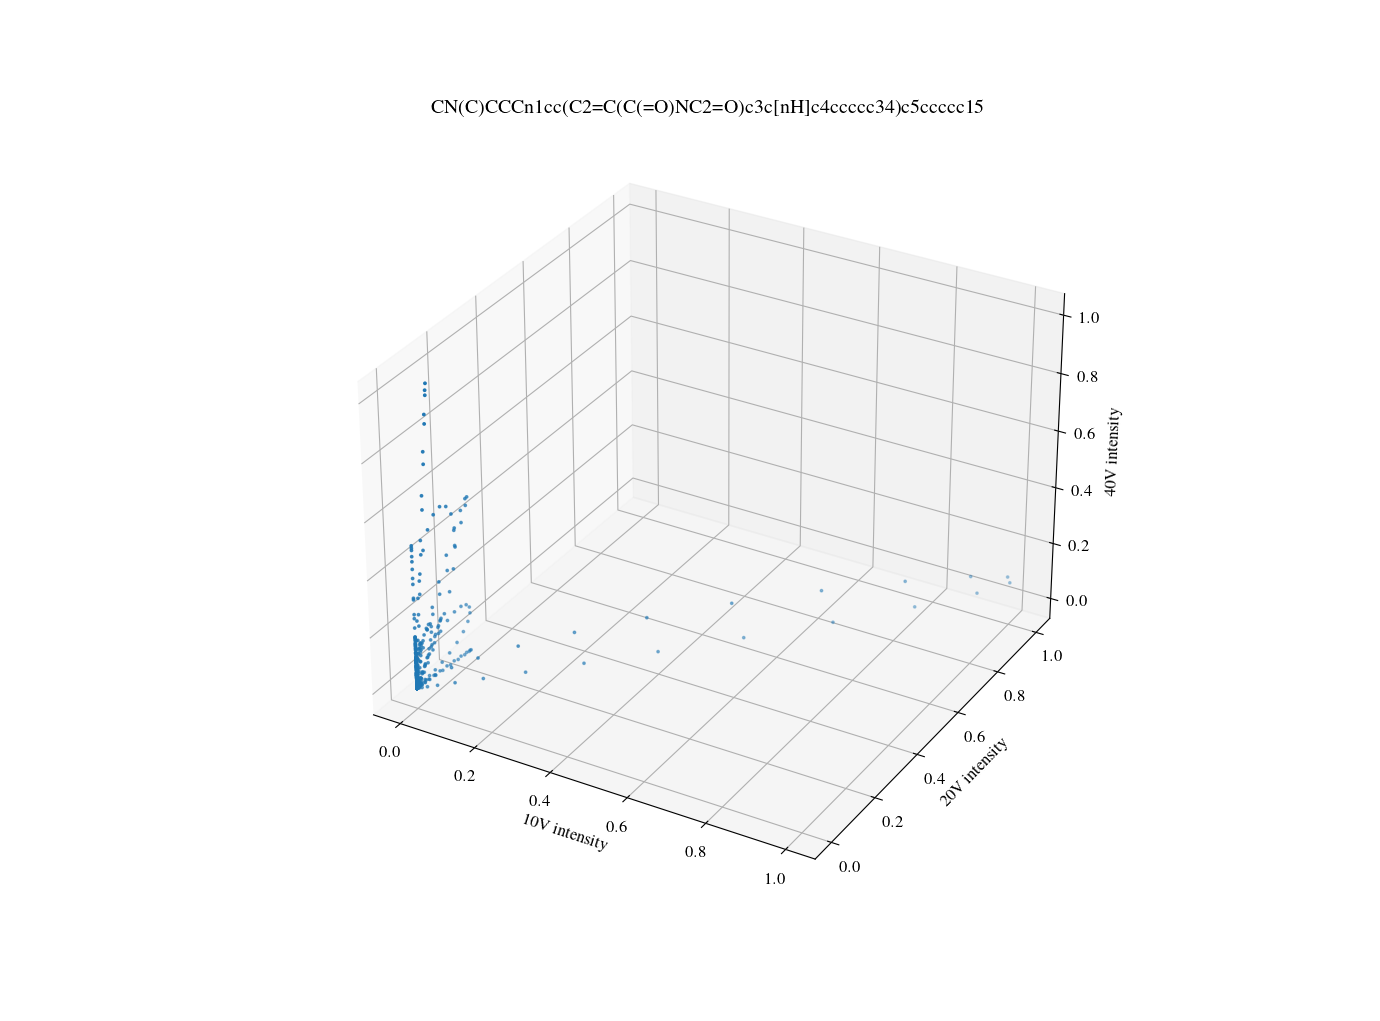

Text(0.5, 0, '40V intensity')

In [10]:
idx = list(db.keys()).index("CN(C)CCCn1cc(C2=C(C(=O)NC2=O)c3c[nH]c4ccccc34)c5ccccc15")
ms = mixtures[idx]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection = "3d")
ax.scatter(ms[0](x_def), ms[1](x_def), ms[2](x_def), s= 3)
ax.set_title(list(db.keys())[idx])
ax.set_xlabel("10V intensity")
ax.set_ylabel("20V intensity")
ax.set_zlabel("40V intensity")